In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
c=0
dir_train = '/content/drive/MyDrive/Deep Learning/train'
for i in os.listdir(dir_train):
  c=c+1
print("Number of train data = ",c)
c=0
dir_validation = '/content/drive/MyDrive/Deep Learning/test'
for i in os.listdir(dir_validation):
  c=c+1
print("Number of validation data = ",c)

Number of train data =  1021
Number of validation data =  822


In [ ]:
import pandas as pd
dat = pd.read_csv('/content/drive/MyDrive/Deep Learning/labels.csv')
dat = dat[0:1021]
dat

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
1016,19299f2fae5ea3f66ee61b38d97167d0,english_springer
1017,1929eb9a7cf1fe75c0731a27545d8893,samoyed
1018,193341cdba32aaace0609a1d633e3f33,american_staffordshire_terrier
1019,19338a74e8e5a84e1c4bdd59309507a5,norwegian_elkhound


In [ ]:
import numpy as np
y = dat['breed']
y

0                          boston_bull
1                                dingo
2                             pekinese
3                             bluetick
4                     golden_retriever
                     ...              
1016                  english_springer
1017                           samoyed
1018    american_staffordshire_terrier
1019                norwegian_elkhound
1020                   german_shepherd
Name: breed, Length: 1021, dtype: object

In [ ]:
y = pd.get_dummies(y)
y

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Image shape =  (375, 500, 3)
[[[  0  18   5]
  [  2  22  10]
  [ 72  92  80]
  ...
  [  1  12   4]
  [  3  14   6]
  [  5  16   8]]

 [[ 45  65  53]
  [  0   7   0]
  [  0  13   1]
  ...
  [  3  14   6]
  [  4  15   7]
  [  6  17   9]]

 [[ 45  65  53]
  [ 17  37  25]
  [  0  14   2]
  ...
  [  4  14   6]
  [  5  15   7]
  [  6  16   8]]

 ...

 [[ 96 137  71]
  [ 96 137  71]
  [104 144  81]
  ...
  [ 25  62  11]
  [ 14  51   0]
  [  9  46   0]]

 [[133 174 108]
  [117 158  92]
  [127 167 104]
  ...
  [ 49  86  35]
  [ 38  75  24]
  [ 20  57   6]]

 [[106 147  81]
  [ 36  77  11]
  [ 92 132  69]
  ...
  [ 43  80  29]
  [ 33  70  19]
  [ 20  57   6]]]


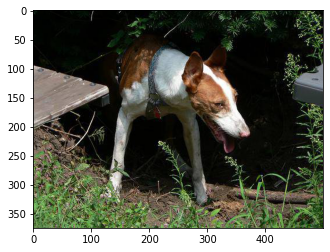

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
for i in os.listdir(dir_train):
    image = plt.imread(dir_train + '/' + i)
    plt.imshow(image)
    print("Image shape = ",np.shape(image))
    print(image)
    break


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

y = np.array(y)
X = []
for i in os.listdir(dir_train):
    img = cv2.imread(dir_train + '/' + i)
    img = cv2.resize(img,(100,100))
    #img = np.array(img)
    #img = np.clip(img/255.0,0.0,1.0)
    X.append(img)
X = np.array(X)

In [ ]:
print(np.shape(X[0]))
X[0]

(100, 100, 3)


array([[[  1,  13,   0],
        [  6,  16,   5],
        [  0,   4,   3],
        ...,
        [ 20,  22,  17],
        [  8,  16,   8],
        [  7,  14,   3]],

       [[ 26,  35,  22],
        [  4,  11,   2],
        [  0,   4,   2],
        ...,
        [  0,  15,   1],
        [ 15,  25,  22],
        [  4,   8,   3]],

       [[  0,   4,   0],
        [  0,   4,   0],
        [  0,   3,   1],
        ...,
        [ 48,  94,  71],
        [115, 132, 123],
        [  1,   6,   4]],

       ...,

       [[ 81, 128, 102],
        [ 36, 110,  62],
        [ 76, 132,  88],
        ...,
        [ 37,  93,  52],
        [ 91, 159, 121],
        [ 27,  77,  45]],

       [[ 52, 115,  76],
        [101, 162, 127],
        [ 69, 128,  84],
        ...,
        [ 55, 100,  61],
        [ 25,  71,  37],
        [ 12,  62,  25]],

       [[ 95, 158, 119],
        [ 45, 105,  71],
        [ 77, 136,  92],
        ...,
        [ 29,  73,  34],
        [ 39,  84,  51],
        [ 26,  77,  40]]

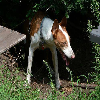

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[0])

In [ ]:
np.shape(X[0])

(100, 100, 3)

In [ ]:
X_validation = []
for i in os.listdir(dir_validation):
    img = cv2.imread(dir_validation + '/' + i)
    img = cv2.resize(img,(100,100))
    #img = np.array(img)
    #img = np.clip(img/255.0,0.0,1.0)
    X_validation.append(img)
X_validation = np.array(X_validation)

In [ ]:
np.shape(X_validation)

(822, 100, 100, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model= Sequential()
model.add(Conv2D(16,kernel_size=(7,7),input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(7,7)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(7,7)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Dense(120,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
26/26 [==============================] - 25s 960ms/step - loss: 4.6702 - accuracy: 0.0355 - val_loss: 4.8658 - val_accuracy: 0.0146
Epoch 2/10
26/26 [==============================] - 16s 605ms/step - loss: 4.4558 - accuracy: 0.0515 - val_loss: 5.1470 - val_accuracy: 0.0146
Epoch 3/10
26/26 [==============================] - 16s 601ms/step - loss: 4.1441 - accuracy: 0.1078 - val_loss: 5.2702 - val_accuracy: 0.0146
Epoch 4/10
26/26 [==============================] - 16s 602ms/step - loss: 3.7051 - accuracy: 0.1691 - val_loss: 5.2922 - val_accuracy: 0.0146
Epoch 5/10
26/26 [==============================] - 16s 598ms/step - loss: 3.2501 - accuracy: 0.2745 - val_loss: 6.2608 - val_accuracy: 0.0049
Epoch 6/10
26/26 [==============================] - 15s 595ms/step - loss: 2.6106 - accuracy: 0.3897 - val_loss: 6.5112 - val_accuracy: 0.0049
Epoch 7/10
26/26 [==============================] - 16s 617ms/step - loss: 2.0163 - accuracy: 0.5306 - val_loss: 8.0434 - val_accuracy: 0.0049

In [ ]:
y_pred = model.predict(X_test)
y_pred =np.argmax(y_pred,axis=1)
y_pred

array([ 90, 117,  68,  71,  11,  62,  89,  10,   8,   6,  49,  24, 119,
        33,   0,  71,  40,  24,  39,  79,   3,   2,  10,   9,  19,   8,
        49,  66,   9,  20, 115,  47,  99,  88,  39,   1,  33,  57,  57,
        33,  54,   6,  31, 115,  69,  36,  71,  37,  40,  79,  69,  36,
        78,  88,  27,   1, 118,  49,  96,  26,  93,  39,  24,  16,  10,
        31,  93,  68,  59, 106,  76,  40,  44,  83, 104,   4,  45,  53,
        61,  83,  12,  86, 114,  59,  25,  20, 111, 118,  42,  25,  21,
       115,  11,  53,  34,  27,  24, 115,  73,  81,   6,  59,   3,  25,
        66,  91,  14,  29,  44,  42, 111,  24,   4,  81, 115, 104,  53,
        42, 115,  57, 115, 116,  24,  66, 119,  36,  42,  33, 100, 113,
         8,  38, 117,  47,   2,  20,  72,  59,  55,  25,  20,  36,  42,
        78,  81,  52, 108,  79,   7,   4,  24,  69,  20,  97,  57,  72,
        42,  19,  89, 116,  83, 111,  93,  97,  25,  44, 119,  11,  25,
        10,  33, 100,  88,  64,  82,  81,  81,  20,  35, 113,  5

In [ ]:
y_test=np.argmax(y_test,axis=1)
y_test

array([105,  32,  13,  67,  69,  54,   6,   7,  16,   3,   1,  94,  19,
        65,  89,  66,  62, 110,  19,  98, 118,  70,  81, 117,  32,  94,
        63,   9,  22,  89,  11,  34,   6,  52,  87,   8,  75,  72,  29,
        72, 119, 100, 100,  30, 109,  25,  29,  60, 110,   3, 108, 112,
        66,   8,  34,  99,  97,  82,  77,  93,  10,  94,  39,  28, 113,
         0,  37,  86, 118,  10,   5,  34,  15,   8,  86,  88,  84,  35,
         7,  28,   5,  13,  87,  69,   8,  28,  96,  59,  91,  27,  54,
         9,  58,  56,  20,  56, 114,   5,   7,  67,   5,  74,  21,  35,
        10, 106,  31,  93,  62,  76,  61,  61,  90,  42,   6, 117,  67,
       113,  96,  20,  74,  53,  38,  90,  73,   5,  14,  35,  55,  16,
       119,  68,  79,  83,  87,  86,  50,  71, 117,  85,  74, 104,  13,
        15,  78,  38,  18,  22,  56,  41,  35,  48,  57, 102,  49,  24,
        64,   0,  23, 101,   1,  31,  13,  15,  94,  82,  20,  73,  48,
        15,  39,  70,  99, 115,  49,  46,  99,  59, 114,  14,  7

In [ ]:
pred = model.predict(X_validation)
classes =np.argmax(pred,axis=1)
classes

array([ 68,  28, 111, 118,  66,  78, 109, 113,  66,   3, 106,  73,  36,
        71,  38,  36,  90,  97, 113,   0, 102,  17,  47,  93,  92,  33,
         6,  68, 119,  33,  90,  81,  91,  58,  11,  11,  19,  36, 115,
        29, 113, 115,  68,  98,  84,  29,  90, 104, 114,   4, 119,  19,
       116,  38,  83,  33,  66, 106,  44,  33,  31,  41,  11,  13,  61,
         0,  38, 115, 115, 113, 105,  19,  58,  30,  20, 109,  81,  59,
         3,  70,  71,  93,  89,  75,  59,  99,  49,  39,  49,  52,  96,
         1,  69,   9,  99,   3,  33,  19,  45,  99,  39,   7,  96,   8,
        52,  59,  10, 100,  59,  71,  19,  53,  81,  81,  24,  83, 100,
        17,  56,  51,   2,  29,  19,  30,  82,  19,  11,  52, 100,   3,
        71,   1,   5,  27,  59, 116,  64,  29,  66,  55,  26,  57,  83,
        20, 102,  17,   5,  33,  86,  39, 100,  10,  90,  83,  94,  34,
       116,  46,  20, 119,   6, 100,  36,  67,  11, 116,  11,  50,  38,
        17, 104,  90,  79,  42,  97,  56,  59,  32,  97,  28,  9

In [ ]:
model = Sequential([Conv2D(16,(3,3),activation="relu",input_shape=(50,50,1)),MaxPooling2D(2,2),
                    Conv2D(32,(3,3),activation="relu"),MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation="relu"),MaxPooling2D(2,2),
                    Flatten(),
                    Dense(512,activation="relu"),
                    Dense(120,activation="softmax"),
                  ])

